In [1]:
from climtools import climtools_lib as ctl
from regrid_ECE import regrid_files
import spectfbcalc_lib as sfc
import plot as pl

No DISPLAY variable set. Switching to agg backend


In [5]:
from importlib import reload
reload(sfc)
reload(pl)

<module 'plot' from '/work/users/malbanese/radspesoft/SpectFbCalc_m/plot.py'>

In [3]:
sfc.mytestfunction()

test!


In [4]:
ctl.datestamp()

'2025-04-09T12:04:18'

In [2]:
import sys
import os
import glob
import re

import numpy as np
import xarray as xr
import pandas as pd

from climtools import climtools_lib as ctl
from matplotlib import pyplot as plt
import matplotlib.cbook as cbook
from scipy import stats
import pickle
import dask.array as da
import yaml
from difflib import get_close_matches
import re

In [6]:
%matplotlib inline

### Simulation regridding

In [ ]:
# input_pattern = "/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1*.nc"  # Use glob pattern to match all .nc files in the folder
target_grid = "r180x90"
method = "ycon"
output_dir = "/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pi/"

import glob
files = sorted(glob.glob("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa*.nc"))

excluded_keywords = ["_pme", "_snr", "_tnr"]
filtered_files = [f for f in files if not any(ex in f for ex in excluded_keywords)]

for file in filtered_files:
    try:
        print(f"Processing {file}...")
        regrid_files(file, target_grid, method, output_dir)
    except Exception as e:
        print(f"Errore con {file}: {e}")
        break

Processing /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_ci.nc...
Regridded file saved: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_ci_regridded.nc
Processing /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_cp.nc...
Regridded file saved: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_cp_regridded.nc
Processing /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_e.nc...
Regridded file saved: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_e_regridded.nc
Processing /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_ewss.nc...
Regridded file saved: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_ewss_regridded.nc
Processing /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipa/pipa_1850_lnsp.nc...
Regridded file saved: /work/users/malbanese/radspesoft/Spect

## lib test

In [8]:
config = "/work/users/malbanese/radspesoft/SpectFbCalc_m/config.yaml"
kernel = "HUANG"
standard_dict = "/work/users/malbanese/radspesoft/SpectFbCalc_m/configvariable.yaml"

# warning: for ec-earth4 i have to change time_counter = time
# pressure_levels = plev

In [3]:
import dask
dask.config.set(scheduler='single-threaded')

In [6]:
rad_palp = sfc.Rad_anomaly_planck_surf_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'ssrd': 'rsds', 't': 'ta'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['ci', 'time', 'lat', 'lon', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables to consider upload...
Read parameters f

In [7]:
rad_psw = sfc.Rad_anomaly_planck_atm_lr_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'time_counter': 'time', 'pressure_levels': 'plev'}
Not recognized variables that were not renamed: ['tasmin', 'tasmax', 'tdps', 'psl', 'rsdt', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll', 'alb', 'time_centered', 'hur', 'ua', 'va', 'zg']
Variables in dataset after renaming: ['tas', 'tasmin', 'tasmax', 'tdps', 'ts', 'psl', 'ps', 'rsdt', 'rsut', 'rlut', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll

In [7]:
rad_a = sfc.Rad_anomaly_albedo_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'ssrd': 'rsds', 't': 'ta'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'q', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['ci', 'time', 'lat', 'lon', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'q', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables to consider upload...
Read parameters from confi

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)


In [8]:
rad_wv = sfc.Rad_anomaly_wv_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'time_counter': 'time', 'pressure_levels': 'plev'}
Not recognized variables that were not renamed: ['tasmin', 'tasmax', 'tdps', 'psl', 'rsdt', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll', 'alb', 'time_centered', 'hur', 'ua', 'va', 'zg']
Variables in dataset after renaming: ['tas', 'tasmin', 'tasmax', 'tdps', 'ts', 'psl', 'ps', 'rsdt', 'rsut', 'rlut', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll

In [9]:
## ATTENZIONE HO MODIFICATO FUNZIONI CALC ANOMS E WRAPPER PER ECE4 TOGLIENDO ALBEDO
all_anoms = sfc.calc_anoms_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Renamed variables: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta'}
Computed variable 'rsus' using expression: rsds - ssr
Computed variable 'ts' using expression: tas
Variables to consider upload...
Read parameters from configuration file...
Time range used for the simulation analysis: {'start': '1850-01-01', 'end': '1853-12-31'}
Loading surface pressure data...
No variables needed to be renamed.
Failed to evaluate expression 'rsds - ssr': name 'rsds' is not defined
Failed to compute variable 'rsus'
Failed to evaluate expression 'tas': name 'tas' is not defined
Failed to compute variable 'ts'
Upload reference climatology for Rad anomaly...
Renamed variables: {'q': 'hus', 'sp': 'ps', 'ssrd': 'rsds', 't': 'ta'}
Computed variable 'rsus' using expression: rsds - ssr
Computed variable 'ts' using expression: tas
Using pre-loaded kernels.
Regridding completed in 0:00:00.320419
Regridding completed in 0:00:00.301343
Regridding completed in 0:00:

/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)
/work/users/malbanese/miniforge/envs/spectfbcalc/lib/python3.11/site-packages/dask/_task_spec.py:741: RuntimeWarning: divide by zero encountered in divide
  return self.func(*new_argspec)


w-v
Regridding completed in 0:00:00.306600
Regridding completed in 0:00:00.308116
Regridding completed in 0:00:00.318957


In [ ]:
feedback = sfc.calc_fb_wrapper(config, kernel, standard_dict)

In [ ]:
fb_cloud = sfc.feedback_cloud_wrapper(config, kernel, standard_dict)

# VARIOUS TEST

In [8]:
def test_read_data():
    try:
        print("Caricamento dei dati...")
        ds = sfc.read_data(config, standard_dict)
        
        print(f"Dataset caricato con successo! Variabili: {list(ds.variables)}")
        
        if 'hus' in ds.variables:
            print("La variabile 'hus' è presente nel dataset.")
        else:
            print("La variabile 'hus' NON è presente nel dataset.")
            
        # NaN
        nan_hus = ds['hus'].isnull().sum().compute()
        print(f"Numero di NaN in 'hus': {nan_hus}")
        
    except Exception as e:
        print(f"Errore durante il caricamento dei dati: {e}")

# Esegui il test
test_read_data()

Caricamento dei dati...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'time_counter': 'time', 'pressure_levels': 'plev'}
Not recognized variables that were not renamed: ['tasmin', 'tasmax', 'tdps', 'psl', 'rsdt', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll', 'alb', 'time_centered', 'hur', 'ua', 'va', 'zg']
Variables in dataset after renaming: ['tas', 'tasmin', 'tasmax', 'tdps', 'ts', 'psl', 'ps', 'rsdt', 'rsut', 'rlut', 'sfcWind', 'sfcWindmax', 'snd', 'albsn', 'hfss', 'hfls', 'clt', 'pr', 'prsn', 'hurs', 'prw', 'lwp', 'evspsbl', 'tauu', 'tauv', 'rsns', 'rlns', 'rsnt', 'rlnt', 'rsntcs', 'rlntcs', 'iwp', 'clh', 'clm', 'cll', 'alb', 'time_center

In [6]:
import xarray as xr
import os
import glob

def check_files_compatibility(directory_path, file_pattern):
    """
    Verifica la compatibilità delle dimensioni 'lat', 'lon' e 'time' tra i file .nc specificati.
    
    Parameters:
    -----------
    directory_path : str
        Il percorso della directory dove si trovano i file .nc.
    file_pattern : str
        Il pattern dei nomi dei file da cercare, come 'pira_1850_*.nc'.
    
    Returns:
    --------
    bool : True se tutti i file sono compatibili, False altrimenti.
    """
    # Ottieni i percorsi di tutti i file che corrispondono al pattern
    file_paths = glob.glob(os.path.join(directory_path, file_pattern))
    
    if not file_paths:
        print(f"Nessun file trovato con il pattern '{file_pattern}' nella directory '{directory_path}'.")
        return False

    # Carica il primo file per ottenere le dimensioni di riferimento
    try:
        ds_reference = xr.open_dataset(file_paths[0])
        lat_ref = ds_reference['lat']
        lon_ref = ds_reference['lon']
        time_ref = ds_reference['time']
        print(f"File di riferimento: {file_paths[0]}")
        print(f"Dimensioni Lat: {lat_ref.shape}, Lon: {lon_ref.shape}, Time: {time_ref.shape}")
    except Exception as e:
        print(f"Errore nell'aprire il file {file_paths[0]}: {e}")
        return False
    
    # Confronta le dimensioni degli altri file
    for file_path in file_paths[1:]:
        try:
            ds = xr.open_dataset(file_path)
            lat = ds['lat']
            lon = ds['lon']
            time = ds['time']
            print(f"Confrontando con il file: {file_path}")
            print(f"Dimensioni Lat: {lat.shape}, Lon: {lon.shape}, Time: {time.shape}")
            
            # Verifica se le dimensioni lat, lon e time sono uguali
            if not (lat.shape == lat_ref.shape and lon.shape == lon_ref.shape and time.shape == time_ref.shape):
                print(f"Attenzione: {file_path} ha dimensioni incompatibili.")
                return False
        except Exception as e:
            print(f"Errore nell'aprire il file {file_path}: {e}")
            return False
    
    print("Tutti i file sono compatibili.")
    return True

# Percorso della directory dove si trovano i file .nc
directory_path = "/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/"

# Pattern dei nomi dei file
file_pattern = 'tpa1_*.nc'

# Esegui il controllo della compatibilità
compatible = check_files_compatibility(directory_path, file_pattern)
print("Risultato controllo compatibilità:", compatible)

File di riferimento: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1_1850_uas.nc
Dimensioni Lat: (256,), Lon: (512,), Time: (12,)
Confrontando con il file: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1_1850_ci.nc
Dimensioni Lat: (256,), Lon: (512,), Time: (12,)
Confrontando con il file: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1_1850_sshf.nc
Dimensioni Lat: (256,), Lon: (512,), Time: (12,)
Confrontando con il file: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1_1850_tciw.nc
Dimensioni Lat: (256,), Lon: (512,), Time: (12,)
Confrontando con il file: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1_1850_ttrc.nc
Dimensioni Lat: (256,), Lon: (512,), Time: (12,)
Confrontando con il file: /work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1_1850_t.nc
Dimensioni Lat: (256,), Lon: (512,), Time: (12,)
Confrontando con il file: /work/users/malbane

#### CONTROLLO VARIABILI

##### TSR e TSRC per ottenere RSUTCS  

Numero di punti in cui TSRC > TSR: 183203
Rapporto medio TSRC/TSR: 1.195


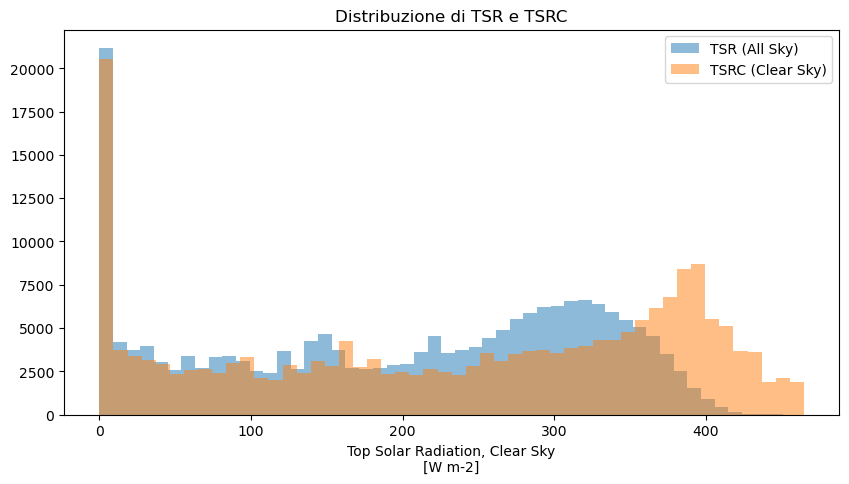

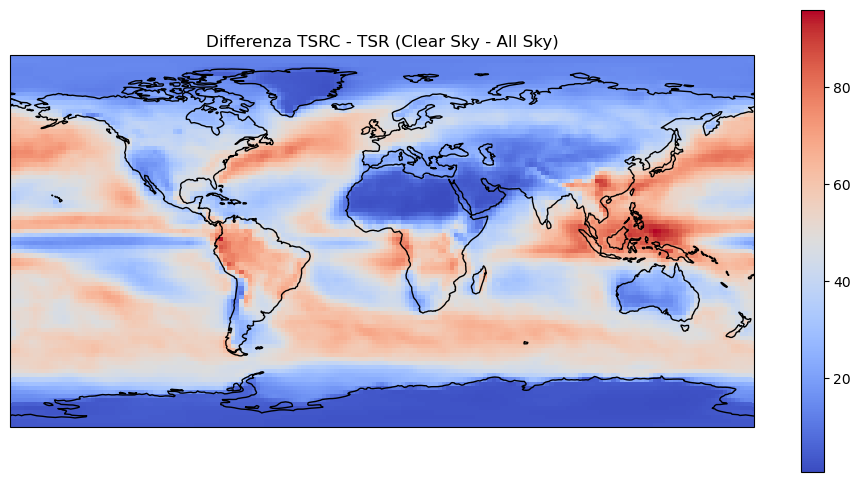

TSR min/max: 0.0 / 451.0533786996086
TSRC min/max: 0.0 / 464.7449769824259


In [ ]:
import xarray as xr

# codice verifica che tsrc < tsr perchè cielo sereno, c'è meno diffusione e assorbimento delle nubi, 
# quindi la radiazione netta è generalmente maggiore rispetto al caso con le nubi.
ds = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pina/pina_1850_tsr_regridded.nc")
ds1 = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pina/pina_1850_tsrc_regridded.nc")

tsr = ds["tsr"]  
tsrc = ds1["tsrc"]

# Controlla se ci sono valori anomali
anomali = (tsrc > tsr).sum().item()
print(f"Numero di punti in cui TSRC > TSR: {anomali}") #: tsrc > tsr = 183203

rapporto_medio = (tsrc / tsr).mean().item()
print(f"Rapporto medio TSRC/TSR: {rapporto_medio:.3f}") #1.195 ??????   PROBLEMA

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
tsr.plot.hist(bins=50, alpha=0.5, label='TSR (All Sky)')
tsrc.plot.hist(bins=50, alpha=0.5, label='TSRC (Clear Sky)')
plt.legend()
plt.title("Distribuzione di TSR e TSRC")
plt.show()


import cartopy.crs as ccrs

diff = tsrc - tsr

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
diff.mean(dim='time').plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)
ax.coastlines()
plt.title("Differenza TSRC - TSR (Clear Sky - All Sky)")
plt.show()

print(f"TSR min/max: {tsr.min().values} / {tsr.max().values}")
print(f"TSRC min/max: {tsrc.min().values} / {tsrc.max().values}")

##### SSRD e SSR

array(95586) punti con ssrd = 0!


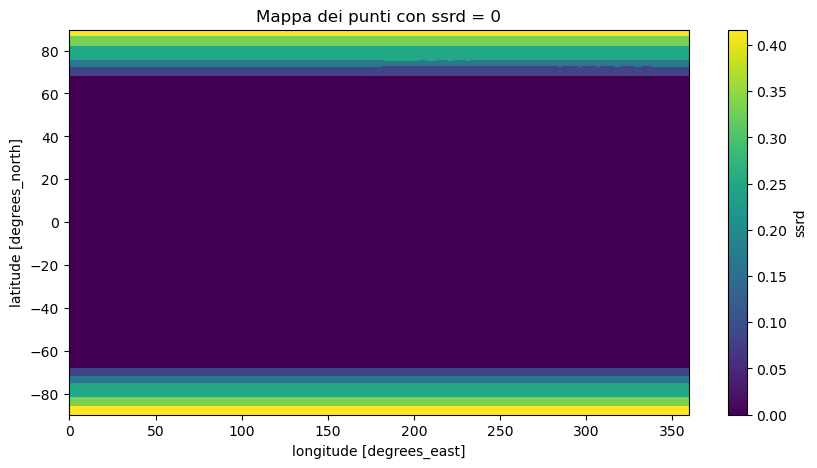

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pina/pina_1850_ssrd.nc")
ds1 = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pina/pina_1850_ssr.nc")

var_ssrd = ds["ssrd"]  
var_ssr = ds1["ssr"]

var_rsus = var_ssrd - var_ssr

# Controlla se ci sono valori anomali
n_zeros_ssrd = (var_ssrd == 0).sum().compute()
print(f"Warning: {n_zeros_ssrd} punti con ssrd = 0!")

#Ho fatto check ssrd, ssr e rsus e i valori pari a 0 di ssrd sono 10980..
#ssrd è la radiazione solare in arrivo.. in realtà gli 0 sono ai poli (OK!!), perchè ho stampato la maschera qui, non i valori 0

# Visualizza la mappa dei punti con rsds = 0
zero_mask = (var_ssrd == 0).mean(dim='time')  # Media nel tempo per identificare dove sono persistenti

plt.figure(figsize=(10, 5))
zero_mask.plot()
plt.title("Mappa dei punti con ssrd = 0")
plt.show()


In [1]:
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pina/pina_1850_q.nc")
ds1 = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pina/pina_1850_t.nc")
ds2 = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pina/pina_1850_tas.nc")
var_q = ds["q"]  
var_t = ds1["t"] #ta
var_tas = ds2["tas"] #ts

# Controlla se ci sono valori anomali
n_zeros_q = (var_q == 0).sum().compute()
print(f"Warning: {n_zeros_q} punti con q = 0!")

n_zeros_t = (var_t == 0).sum().compute()
print(f"Warning: {n_zeros_t} punti con t = 0!")

n_zeros_tas = (var_tas == 0).sum().compute()
print(f"Warning: {n_zeros_tas} punti con tas = 0!")


# Visualizza la mappa dei punti con rsds = 0
# zero_mask = (var_ssrd == 0).mean(dim='time')  # Media nel tempo per identificare dove sono persistenti

# plt.figure(figsize=(10, 5))
# zero_mask.plot()
# plt.title("Mappa dei punti con ssrd = 0")
# plt.show()

array(0) punti con q = 0!
array(0) punti con t = 0!
array(0) punti con tas = 0!


### PLOT

Plot salvato in /work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece3/ece3_RLCRIT_UPHYS_allfb.png


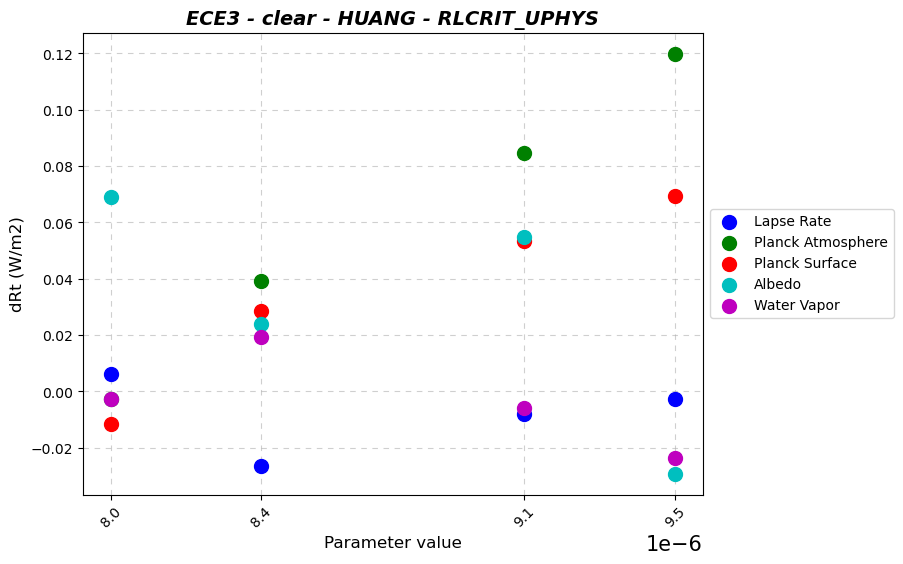

In [14]:
#PLOT ECE3
base_folder = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3"
feedbacks = [
    "dRt_lapse-rate_global_clr_climatology-HUANGkernels.nc",
    "dRt_planck-atmo_global_clr_climatology-HUANGkernels.nc",
    "dRt_planck-surf_global_clr_climatology-HUANGkernels.nc",
    "dRt_albedo_global_clr_climatology-HUANGkernels.nc",
    "dRt_water-vapor_global_clr_climatology-HUANGkernels.nc"
]
param_name = "RLCRIT_UPHYS"  # Parametro da modificare
valchange = {
    "ENTRORG": [x * 1e-4 for x in [1.35, 1.53, 1.87, 2.05]], #cambia notazione
    "RPRCON": [x * 1e-3 for x in [1.9, 1.62, 1.07, 0.8]],
    "DETRPEN": [x * 1e-4 for x in [0.25, 0.5, 1.0, 1.25]],
    "RMFDEPS": [0.16, 0.23, 0.37, 0.44],
    "RVICE": [0.098, 0.118, 0.157, 0.176],
    "RSNOWLIN2": [0.057, 0.046, 0.024, 0.013],
    "RCLDIFF": [x * 1e-6 for x in [4, 3.5, 2.5, 2]],
    "RLCRIT_UPHYS": [x * 1e-5 for x in [0.95, 0.91, 0.84, 0.8]]
}
subfolder_pattern = "pi*h"

labels = ["Lapse Rate", "Planck Atmosphere", "Planck Surface", "Albedo", "Water Vapor"]
xlabel = "Parameter value"
ylabel = "dRt (W/m2)"
title = f"ECE3 - clear - HUANG - {param_name}"
output_path = f"/work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece3/ece3_{param_name}_allfb.png"

if param_name in valchange:
    if param_name in ["ENTRORG", "DETRPEN"]:
        formatted_labels = [f"{v}*1e-4" for v in valchange[param_name]]
    elif param_name in ["RPRCON"]:
        formatted_labels = [f"{v}*1e-3" for v in valchange[param_name]]
    elif param_name in ["RCLDIFF"]:
        formatted_labels = [f"{v}*1e-6" for v in valchange[param_name]]
    else:
        formatted_labels = [str(v) for v in valchange[param_name]]
else:
    formatted_labels = None


feedback_data, variation_values = pl.load_dRt_ece3(base_folder, feedbacks, param_name, valchange, subfolder_pattern)
if feedback_data:
    pl.plot_dRt_ece3(feedback_data, variation_values, labels, xlabel, ylabel, title, output_file=output_path, xtick_labels=formatted_labels)

Plot saved in /work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece4/ece4_RPRCON.png


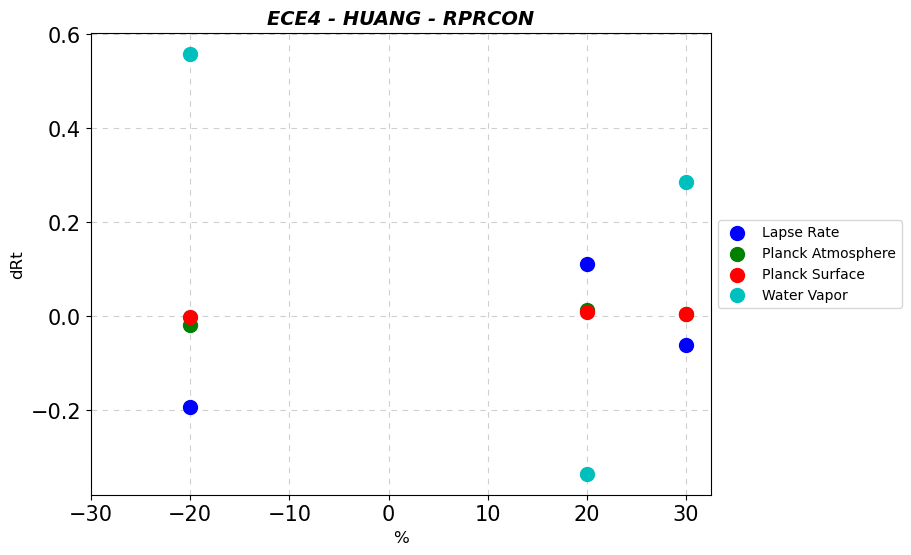

In [14]:
#PLOT ECE4 
base_folder = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece4"
feedbacks = [
    "dRt_lapse-rate_global_clr_climatology-HUANGkernels.nc",
    "dRt_planck-atmo_global_clr_climatology-HUANGkernels.nc",
    "dRt_planck-surf_global_clr_climatology-HUANGkernels.nc",
    "dRt_water-vapor_global_clr_climatology-HUANGkernels.nc"
]
param_name = "RPRCON"
valchange = {
    "RPRCON": [-30, -20, -10, 0, 10, 20, 30],  # Percentage changes
    "ENTRORG": [-30, -20, -10, 0, 10, 20, 30],
    "DETRPEN": [-30, -20, -10, 0, 10, 20, 30],
    "RMFDEPS": [-30, -20, -10, 0, 10, 20, 30]
}
subfolder_pattern = "s00*"  # Matching folder pattern

labels = ["Lapse Rate", "Planck Atmosphere", "Planck Surface", "Water Vapor"]
xlabel = "%"
ylabel = "dRt"
title = f"ECE4 - HUANG - {param_name}"

output_path = f"/work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece4/ece4_{param_name}.png"

feedback_data, variation_values = pl.load_dRt_ece4(base_folder, feedbacks, param_name, valchange, subfolder_pattern)
if feedback_data:
    pl.plot_dRt_ece4(feedback_data, variation_values, labels, xlabel, ylabel, title, output_file=output_path)

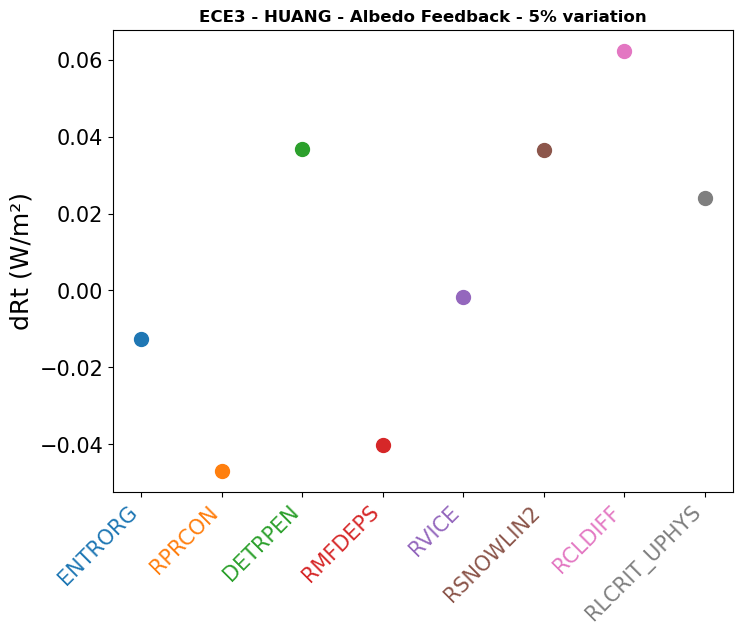

In [42]:
#PLOT ECE3/ECE4 ONE FEEDBACK
base_folder = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3"
xlabel = ""
ylabel = "dRt (W/m²)"
title = "ECE3 - HUANG - Albedo Feedback - 5% variation"
output_path = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece3/ece3_albedo_r.png"  
feedback_file = "dRt_albedo_global_clr_climatology-HUANGkernels.nc"
subfolder_pattern = "pir*"
model = "ece3"

pl.plot_dRt_fb_all_params(base_folder, xlabel, ylabel, title, feedback_file, output_file=output_path, subfolder_pattern=subfolder_pattern, model_type=model)

Plot saved to /work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece3/ece3_planck_surf_norm.png


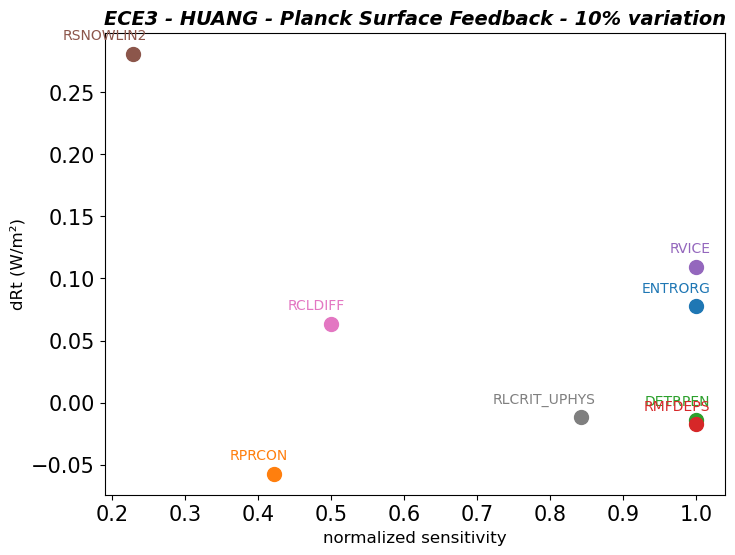

In [29]:
#PLOT ECE3/ECE4 ONE FEEDBACK NORMALIZED
base_folder = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3"

xlabel = "normalized sensitivity"
ylabel = "dRt (W/m²)"
title = "ECE3 - HUANG - Planck Surface Feedback - 10% variation"
valchange = {
    "ENTRORG": [x * 1e-4 for x in [1.35, 1.53, 1.7, 1.87, 2.05]], #cambia notazione
    "RPRCON": [x * 1e-3 for x in [1.9, 1.62, 1.34, 1.07, 0.8]],
    "DETRPEN": [x * 1e-4 for x in [0.25, 0.5, 0.75, 1.0, 1.25]],
    "RMFDEPS": [0.16, 0.23, 0.3, 0.37, 0.44],
    "RVICE": [0.098, 0.118, 0.137, 0.157, 0.176],
    "RSNOWLIN2": [0.057, 0.046, 0.035, 0.024, 0.013],
    "RCLDIFF": [x * 1e-6 for x in [4, 3.5, 3., 2.5, 2]],
    "RLCRIT_UPHYS": [x * 1e-5 for x in [0.95, 0.91, 0.0875, 0.84, 0.8]]
}
subfolder_pattern = "pip*"
model = "ece3"
output_path = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece3/ece3_planck_surf_norm.png"


pl.plot_dRt_fb_all_params_norm(base_folder, valchange, xlabel, ylabel, title, output_file=output_path, subfolder_pattern=subfolder_pattern, model_type=model)


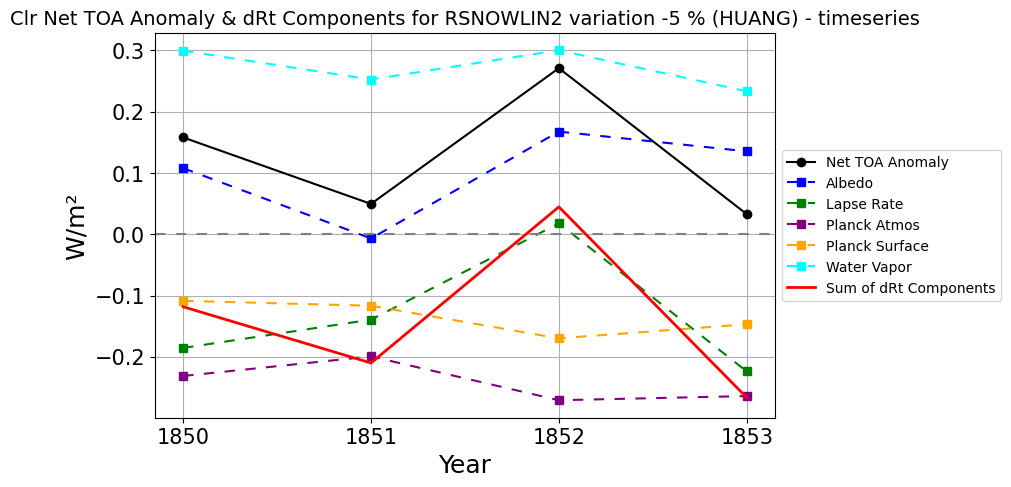

In [28]:
#TIME SERIES
base_folder = "/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/"
par ="pilf"
dRt = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3/pilf/time_s/"
title = "Clr Net TOA Anomaly & dRt Components for RSNOWLIN2 variation -5 % (HUANG) - timeseries"
output = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece3/time_s/toa_anomaly_pilf_si_wid_si100_no_atm_clr.png"

pl.plot_toa_anomaly_ece3(base_folder=base_folder, param=par, dRt_folder=dRt, title=title, output_file=output)

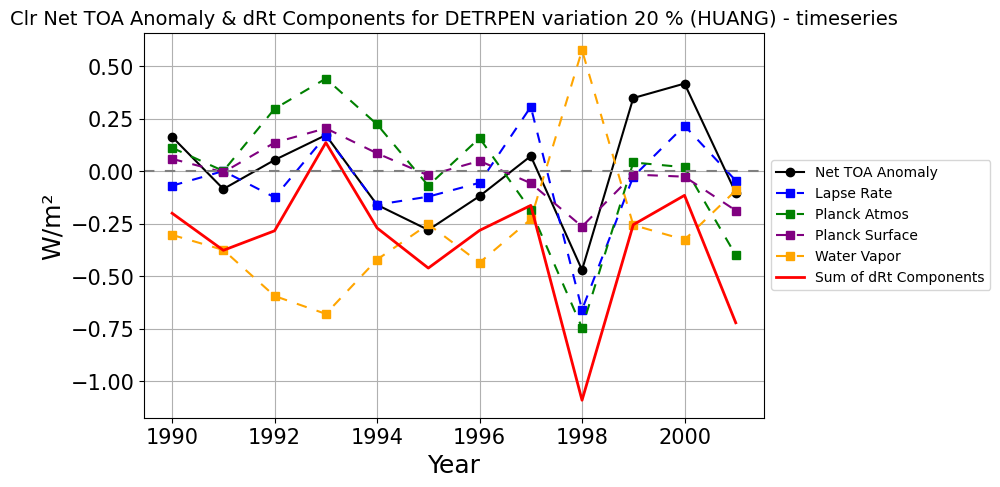

In [16]:
base_folder = "/work/users/malbanese/radspesoft/SpectFbCalc_m/ece4/"
par = "s022" # param has been changed
dRt = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece4/s022/time_s/"
title = "Clr Net TOA Anomaly & dRt Components for DETRPEN variation 20 % (HUANG) - timeseries"
output = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output_plot/rad_Huang/ece4/time_s/toa_anomaly_s022_si_wid_si100_no_atm.png"


pl.plot_toa_anomaly_ece4(base_folder=base_folder, param=par, dRt_folder=dRt, title=title, output_file=output)

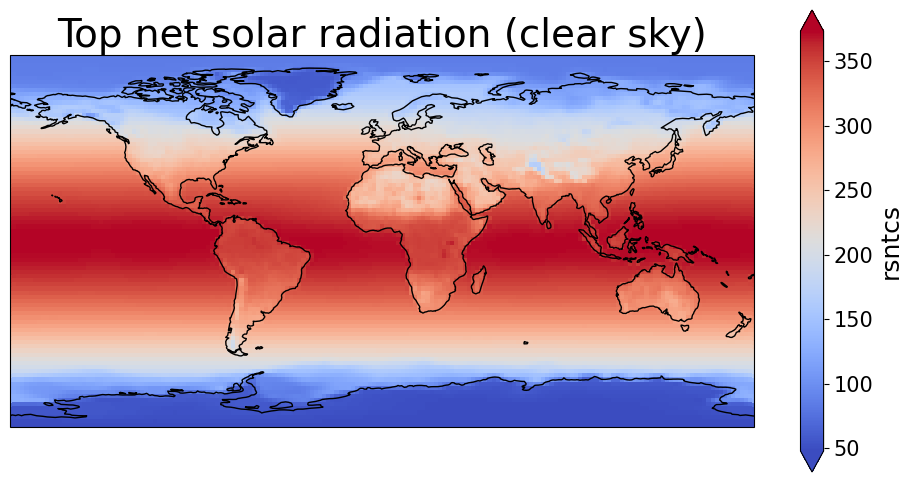

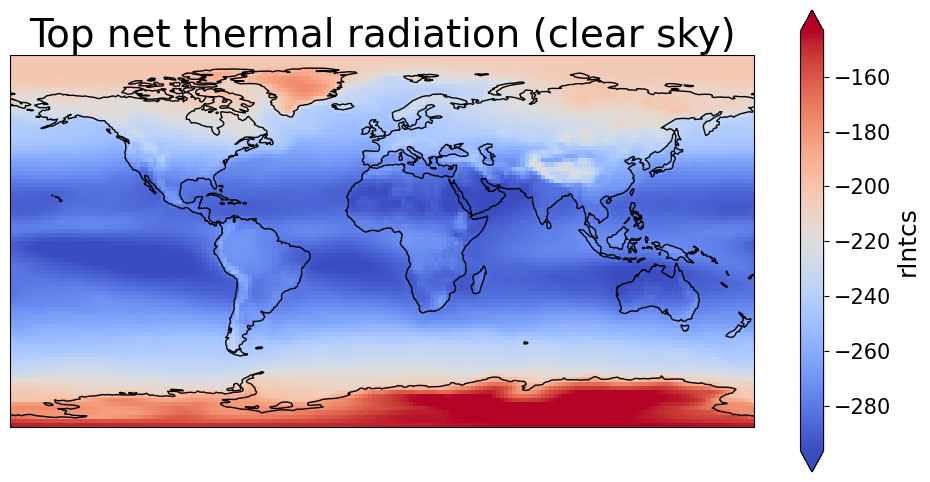

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load once
ds = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece4/t_sim/s001/oifs/regridded/s001_atm_cmip6_1m_1990-1990_regridded.nc")

def plot_map(data, title, cmap='coolwarm'):
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    data.mean(dim='time_counter').plot.pcolormesh(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        add_colorbar=True,
        robust=True  # auto-removes extremes from colorbar range
    )
    ax.coastlines()
    plt.title(title)
    plt.show()

# Plot rsntcs (net solar)
plot_map(ds["rsntcs"], "Top net solar radiation (clear sky)")

# Plot rlntcs (net thermal)
plot_map(ds["rlntcs"], "Top net thermal radiation (clear sky)")

### SCRIPT PLOT TIME SERIES PROVE

In [30]:
#TIME SERIES
ds_sim = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pipb/pipb_*_tnr.nc", combine="by_coords")
ds_ctrl = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/tpa1_*_tnr.nc", combine="by_coords")

tnr_sim = ds_sim["tnr"]  
tnr_ctrl = ds_ctrl["tnr"]

# Compute the annual mean for each year (since we have monthly data)
tnr_sim_annual = tnr_sim.groupby("time.year").mean(dim="time")  # One value per year
tnr_ctrl_annual = tnr_ctrl.groupby("time.year").mean(dim="time")
climatology = tnr_ctrl_annual.mean(dim="year")  

tnr_anomaly = tnr_sim_annual - climatology

tnr_anomaly = ctl.global_mean(tnr_anomaly)
#print("Anomaly test values:\n", tnr_anomaly.values)

#simulation cooling effect? 

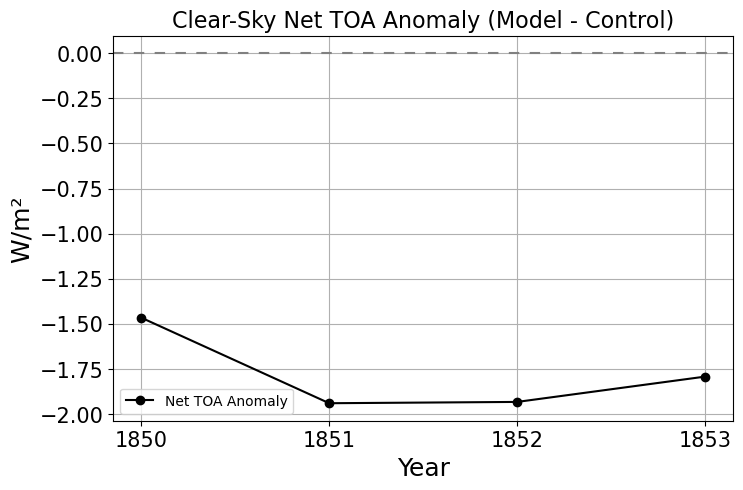

In [31]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(tnr_anomaly["year"], tnr_anomaly, color="black", marker="o", linestyle="-", label="Net TOA Anomaly")

plt.xticks(tnr_anomaly["year"].values, [str(y) for y in tnr_anomaly["year"].values])

# Labels and title
plt.xlabel("Year")
plt.ylabel("W/m²")
plt.title("Clear-Sky Net TOA Anomaly (Model - Control)", fontsize=16)
plt.axhline(0, color="gray", linestyle="--")  # Add a horizontal line at 0 for reference
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [3]:
##Check ts anom and dRt planck surf

import xarray as xr
import matplotlib.pyplot as plt
from climtools import climtools_lib as ctl
import spectfbcalc_lib as sfc

cart_k = "/work/users/malbanese/radspesoft/SpectFbCalc_m/kernels/Huang/toa/"
cart_out = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3/pila/time_s/prova/"
finam = "RRTMG_{}_toa_{}_highR.nc"

allkers = sfc.load_kernel_HUANG(cart_k, cart_out, finam)
kernel = allkers[('clr', 'ts')]

ds_ctrl = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/regridded/tpa1_*_tas_regridded.nc")
ds_sim = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pila/regridded/pila_*_tas_regridded.nc")

var = ds_sim['tas']
var_ctrl = ds_ctrl['tas']
piok = var_ctrl.groupby('time.month').mean()
anoms = var.groupby('time.month') - piok

anoms_r = ctl.regrid_dataset(anoms, kernel.lat, kernel.lon)

# #tsanom = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3/pila/time_s/ts_anomHUANGkernels.nc")
# #tsanom = ctl.global_mean(tsanom["__xarray_dataarray_variable__"])

dRt = (anoms_r.groupby('time.month') * kernel)
dRt_glob = ctl.global_mean(dRt)


plt.figure(figsize=(8, 5))
plt.plot(dRt_glob, color="black", marker="o", linestyle="-", label="ts anomaly")


Regridding completed in 0:00:02.413194


Regridding completed in 0:00:00.259172
Regridding completed in 0:00:00.266788


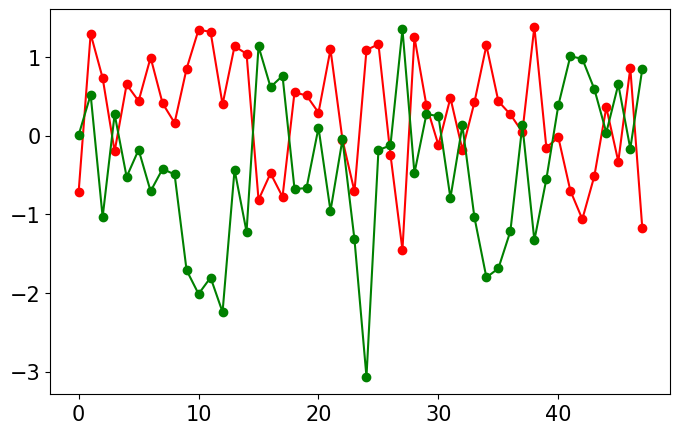

In [7]:
##Check t anom and dRt planck atmo

import xarray as xr
import matplotlib.pyplot as plt
from climtools import climtools_lib as ctl
import spectfbcalc_lib as sfc
import pickle

cart_k = "/work/users/malbanese/radspesoft/SpectFbCalc_m/kernels/Huang/toa/"
cart_out = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3/pila/time_s/prova/"
finam = "RRTMG_{}_toa_{}_highR.nc"

allkers = sfc.load_kernel_HUANG(cart_k, cart_out, finam)
kernelts = allkers[('clr', 'ts')]
kernelt = allkers[('clr','t')]

ds_ctrl_tas = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/regridded/tpa1_*_tas_regridded.nc")
ds_sim_tas = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pila/regridded/pila_*_tas_regridded.nc")

ds_ctrl_t = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/regridded/tpa1_*_t_regridded.nc")
ds_sim_t = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pila/regridded/pila_*_t_regridded.nc")

varts = ds_sim_tas['tas']
varta = ds_sim_t['t']
var_ctrlts = ds_ctrl_tas['tas']
var_ctrlta = ds_ctrl_t['t']
piokts = var_ctrlts.groupby('time.month').mean()
piokta = var_ctrlta.groupby('time.month').mean()
anomsts = varts.groupby('time.month') - piokts
anomsta = varta.groupby('time.month') - piokta

anomsts_r = ctl.regrid_dataset(anomsts, kernelts.lat, kernelts.lon)
anomsta_r = ctl.regrid_dataset(anomsta, kernelt.lat, kernelt.lon)

cose=pickle.load(open(cart_out + 'cose_'+'HUANG'+'.p', 'rb'))
anomsta_interp = anomsta_r.interp(plev = cose) 

anoms_lr = (anomsta_interp - anomsts_r)
anoms_unif = (anomsta_interp - anoms_lr)

# #tsanom = xr.open_dataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3/pila/time_s/ts_anomHUANGkernels.nc")
# #tsanom = ctl.global_mean(tsanom["__xarray_dataarray_variable__"])
dRt_unif = (anoms_unif.groupby('time.month')*kernelt).sum('player')
dRt_lr = (anoms_lr.groupby('time.month')*kernelt).sum('player')

dRt_unif_glob = ctl.global_mean(dRt_unif)
dRt_lr_glob = ctl.global_mean(dRt_lr)


plt.figure(figsize=(8, 5))
plt.plot(dRt_unif_glob, color="red", marker="o", linestyle="-", label="dRt_planck_atmo")
plt.plot(dRt_lr_glob, color="green", marker="o", linestyle="-", label="dRt_lapse_rate")


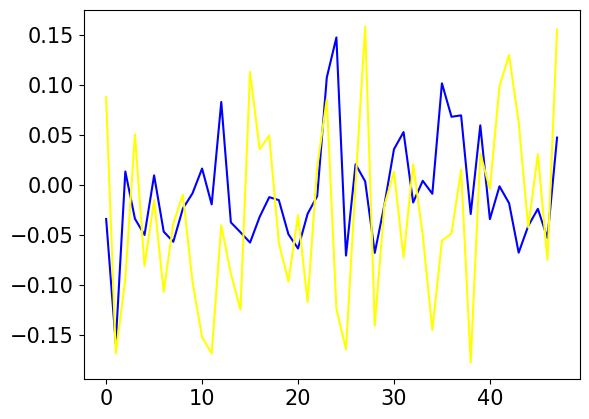

In [5]:
plt.plot(ctl.global_mean(anomsta).mean('plev'), color = "blue")
plt.plot(ctl.global_mean(anomsts), color="yellow")

In [ ]:
##Check funzione 
config = "/work/users/malbanese/radspesoft/SpectFbCalc_m/config.yaml"
kernel = "HUANG"
standard_dict = sfc.standard_names
anoms = sfc.Rad_anomaly_planck_atm_lr_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'t': 'ta'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'q', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'ssrd', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['ci', 'time', 'lat', 'lon', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'q', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'ssrd', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables to consider upload...
Read parameters from configuration

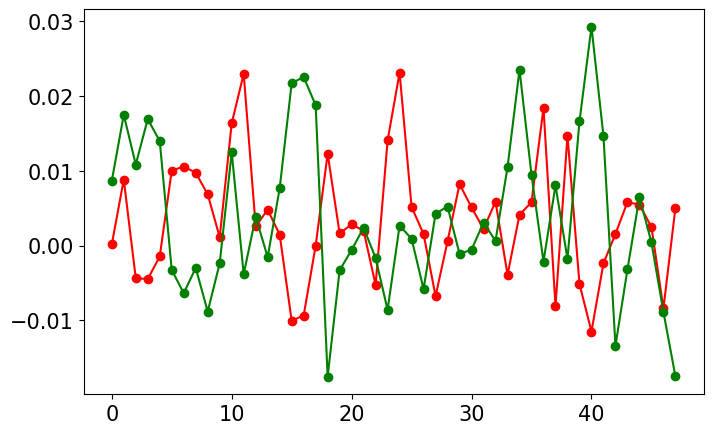

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(anoms['clr','planck-atmo'], color="red", marker="o", linestyle="-", label="dRt_planck_atmo")
plt.plot(anoms['clr','lapse-rate'], color="green", marker="o", linestyle="-", label="dRt_lapse_rate")

Regridding completed in 0:00:00.486683
Regridding completed in 0:00:00.290086
Regridding completed in 0:00:00.295984
Regridding completed in 0:00:00.213802


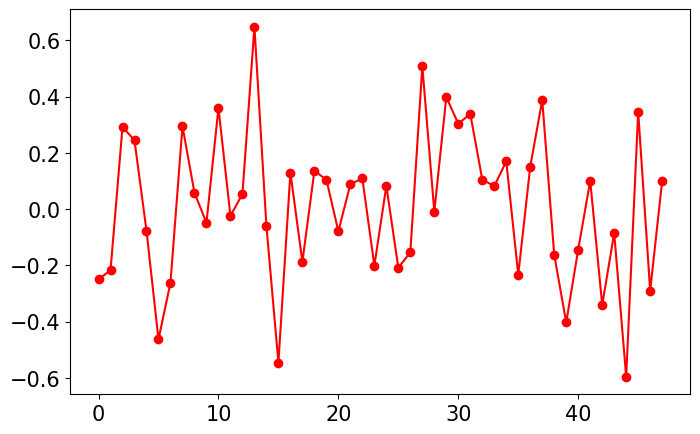

In [34]:
##Check water vapour

import xarray as xr
import matplotlib.pyplot as plt
from climtools import climtools_lib as ctl
import spectfbcalc_lib as sfc

cart_k = "/work/users/malbanese/radspesoft/SpectFbCalc_m/kernels/Huang/toa/"
cart_out = "/work/users/malbanese/radspesoft/SpectFbCalc_m/output/rad_Huang/ece3/pila/time_s/prova/"
finam = "RRTMG_{}_toa_{}_highR.nc"

allkers = sfc.load_kernel_HUANG(cart_k, cart_out, finam)
kernel_lw = allkers[('clr', 'wv_lw')]
kernel_sw = allkers[('clr','wv_sw')]
kernel = kernel_lw + kernel_sw

ds_ctrl_hus = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/regridded/tpa1_*_q_regridded.nc")
ds_sim_hus = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pila/regridded/pila_*_q_regridded.nc")

ds_ctrl_ta = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/std_sim/tpa1/regridded/tpa1_*_t_regridded.nc")
ds_sim_ta = xr.open_mfdataset("/work/users/malbanese/radspesoft/SpectFbCalc_m/ece3/pi/t_sim/pila/regridded/pila_*_t_regridded.nc")

varhus = ds_sim_hus['q']
varta = ds_sim_ta['t']
var_ctrlhus = ds_ctrl_hus['q']
var_ctrlta = ds_ctrl_ta['t']
piokhus = var_ctrlhus.groupby('time.month').mean()
piokta = var_ctrlta.groupby('time.month').mean()

varhus_r = ctl.regrid_dataset(varhus, kernel.lat, kernel.lon)
piokhus_r = ctl.regrid_dataset(piokhus, kernel.lat, kernel.lon)
piokta_r = ctl.regrid_dataset(piokta, kernel.lat, kernel.lon)

cose=pickle.load(open(cart_out + 'cose_'+'HUANG'+'.p', 'rb'))
varhus_interp = varhus_r.interp(plev = cose) 
piokhus_interp = piokhus_r.interp(plev = cose)
piokta_interp = piokta_r.interp(plev = cose)

anoms_ok3 = xr.apply_ufunc(lambda x, mean: np.log(x) - np.log(mean), varhus_interp.groupby('time.month'), piokhus_interp , dask = 'allowed')
coso3= anoms_ok3.groupby('time.month')*sfc.dlnws(piokta_interp)
coso3_r = ctl.regrid_dataset(coso3, kernel.lat, kernel.lon)

dRt_wv = (coso3_r.groupby('time.month')*kernel).sum('player')
dRt_wv_glob = ctl.global_mean(dRt_wv)


plt.figure(figsize=(8, 5))
plt.plot(dRt_wv_glob, color="red", marker="o", linestyle="-", label="dRt_water_v")

In [ ]:
##Check funzione
config = "/work/users/malbanese/radspesoft/SpectFbCalc_m/config.yaml"
kernel = "HUANG"
standard_dict = sfc.standard_names
anoms = sfc.Rad_anomaly_wv_wrapper(config, kernel, standard_dict)

Kernel upload...
Dataset to analyze upload...
Check that the files in config have the necessary variables.
Standard variable names: ['rsus', 'rsds', 'time', 'lat', 'lon', 'plev', 'ps', 'ts', 'tas', 'ta', 'hus', 'rlut', 'rsut', 'rlutcs', 'rsutcs']
Variables automatically renamed: {'q': 'hus', 'ssrd': 'rsds', 't': 'ta'}
Not recognized variables that were not renamed: ['ci', 'cp', 'e', 'ewss', 'lnsp', 'lsp', 'msl', 'nsss', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'str', 'strc', 'strd', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables in dataset after renaming: ['ci', 'time', 'lat', 'lon', 'cp', 'e', 'ewss', 'plev', 'lnsp', 'lsp', 'msl', 'nsss', 'hus', 'r', 'ro', 'sd', 'sf', 'slhf', 'sp', 'sshf', 'ssr', 'ssrc', 'rsds', 'str', 'strc', 'strd', 'ta', 'tas', 'tcc', 'tciw', 'tclw', 'tcwv', 'tds', 'totp', 'tsr', 'tsrc', 'ttr', 'ttrc', 'u', 'uas', 'v', 'vas', 'z']
Variables to consider upload...
Read parameters f

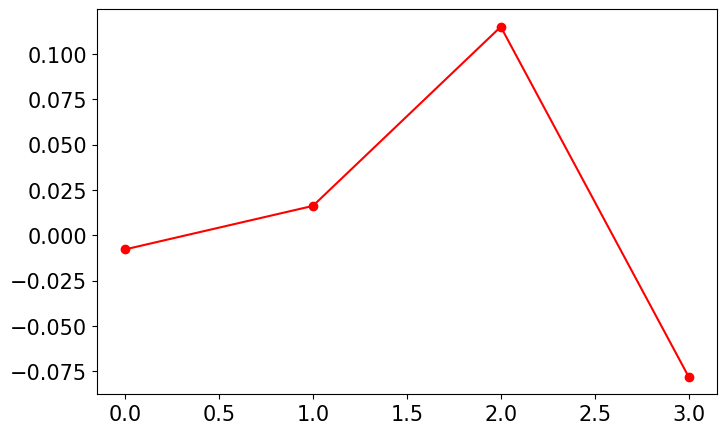

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(anoms['clr','water-vapor'], color="red", marker="o", linestyle="-", label="dRt_water_vapor")